# Cleaning Hurricane observations
This notebook is all about EDA of point hurricane observations

In [57]:
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import pandas as pd

# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the dataset

In [3]:
csv_path = '/Users/atma6951/Documents/GIS_data/Analytics/hurricanes/from_noaa_ibtracks/csv_with_metadata/Allstorms.ibtracs_all.v03r09.csv'

In [33]:
%%time
full_df = pd.read_csv(csv_path, low_memory=False, nrows=500, 
                      skiprows=[0,2], na_values=['-999'])
full_df.shape

CPU times: user 33 ms, sys: 6.35 ms, total: 39.4 ms
Wall time: 34.9 ms


In [34]:
full_df.shape

(500, 200)

In [38]:
list_of_columns = list(full_df.columns)
list_of_columns

['Serial_Num',
 'Season',
 'Num',
 'Basin',
 'Sub_basin',
 'Name',
 'ISO_time',
 'Nature',
 'Latitude',
 'Longitude',
 'Wind(WMO)',
 'Pres(WMO)',
 'Center',
 'Wind(WMO) Percentile',
 'Pres(WMO) Percentile',
 'Track_type',
 'Latitude_for_mapping',
 'Longitude_for_mapping',
 'Current Basin',
 'hurdat_atl_lat',
 'hurdat_atl_lon',
 'hurdat_atl_grade',
 'hurdat_atl_wind',
 'hurdat_atl_pres',
 'td9636_lat',
 'td9636_lon',
 'td9636_grade',
 'td9636_wind',
 'td9636_pres',
 'reunion_lat',
 'reunion_lon',
 'reunion_grade',
 'reunion_wind',
 'reunion_pres',
 'atcf_lat',
 'atcf_lon',
 'atcf_grade',
 'atcf_wind',
 'atcf_pres',
 'mlc_natl_lat',
 'mlc_natl_lon',
 'mlc_natl_grade',
 'mlc_natl_wind',
 'mlc_natl_pres',
 'ds824_sh_lat',
 'ds824_sh_lon',
 'ds824_sh_grade',
 'ds824_sh_wind',
 'ds824_sh_pres',
 'ds824_ni_lat',
 'ds824_ni_lon',
 'ds824_ni_grade',
 'ds824_ni_wind',
 'ds824_ni_pres',
 'bom_lat',
 'bom_lon',
 'bom_grade',
 'bom_wind',
 'bom_pres',
 'ds824_au_lat',
 'ds824_au_lon',
 'ds824_au_gr

In [36]:
full_df.head()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,...,jtwc_??_wrad34_rad3,jtwc_??_wrad34_rad4,jtwc_??_wrad50_rad1,jtwc_??_wrad50_rad2,jtwc_??_wrad50_rad3,jtwc_??_wrad50_rad4,jtwc_??_wrad64_rad1,jtwc_??_wrad64_rad2,jtwc_??_wrad64_rad3,jtwc_??_wrad64_rad4
0,1842298N11080,1842,1,NI,BB,NOT NAMED,1842-10-25 06:00:00,NR,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NOT NAMED,1842-10-25 12:00:00,NR,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1842298N11080,1842,1,NI,AS,NOT NAMED,1842-10-25 18:00:00,NR,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1842298N11080,1842,1,NI,AS,NOT NAMED,1842-10-26 00:00:00,NR,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1842298N11080,1842,1,NI,AS,NOT NAMED,1842-10-26 06:00:00,NR,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merge all location columns

In [52]:
lat_columns = [x for x in list_of_columns if 'lat' in x.lower()]
lon_columns = [x for x in list_of_columns if 'lon' in x.lower()]
for x in zip(lat_columns, lon_columns):
    print(x)

('Latitude', 'Longitude')
('Latitude_for_mapping', 'Longitude_for_mapping')
('hurdat_atl_lat', 'hurdat_atl_lon')
('td9636_lat', 'td9636_lon')
('reunion_lat', 'reunion_lon')
('atcf_lat', 'atcf_lon')
('mlc_natl_lat', 'mlc_natl_lon')
('ds824_sh_lat', 'ds824_sh_lon')
('ds824_ni_lat', 'ds824_ni_lon')
('bom_lat', 'bom_lon')
('ds824_au_lat', 'ds824_au_lon')
('jtwc_sh_lat', 'jtwc_sh_lon')
('jtwc_wp_lat', 'jtwc_wp_lon')
('td9635_lat', 'td9635_lon')
('ds824_wp_lat', 'ds824_wp_lon')
('jtwc_io_lat', 'jtwc_io_lon')
('cma_lat', 'cma_lon')
('hurdat_epa_lat', 'hurdat_epa_lon')
('jtwc_ep_lat', 'jtwc_ep_lon')
('ds824_ep_lat', 'ds824_ep_lon')
('jtwc_cp_lat', 'jtwc_cp_lon')
('tokyo_lat', 'tokyo_lon')
('neumann_lat', 'neumann_lon')
('hko_lat', 'hko_lon')
('cphc_lat', 'cphc_lon')
('wellington_lat', 'wellington_lon')
('newdelhi_lat', 'newdelhi_lon')
('nadi_lat', 'nadi_lon')


In [55]:
location_df = full_df[lat_columns + lon_columns]
location_df.shape

(500, 58)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1140d8e80>,
      dtype=object)

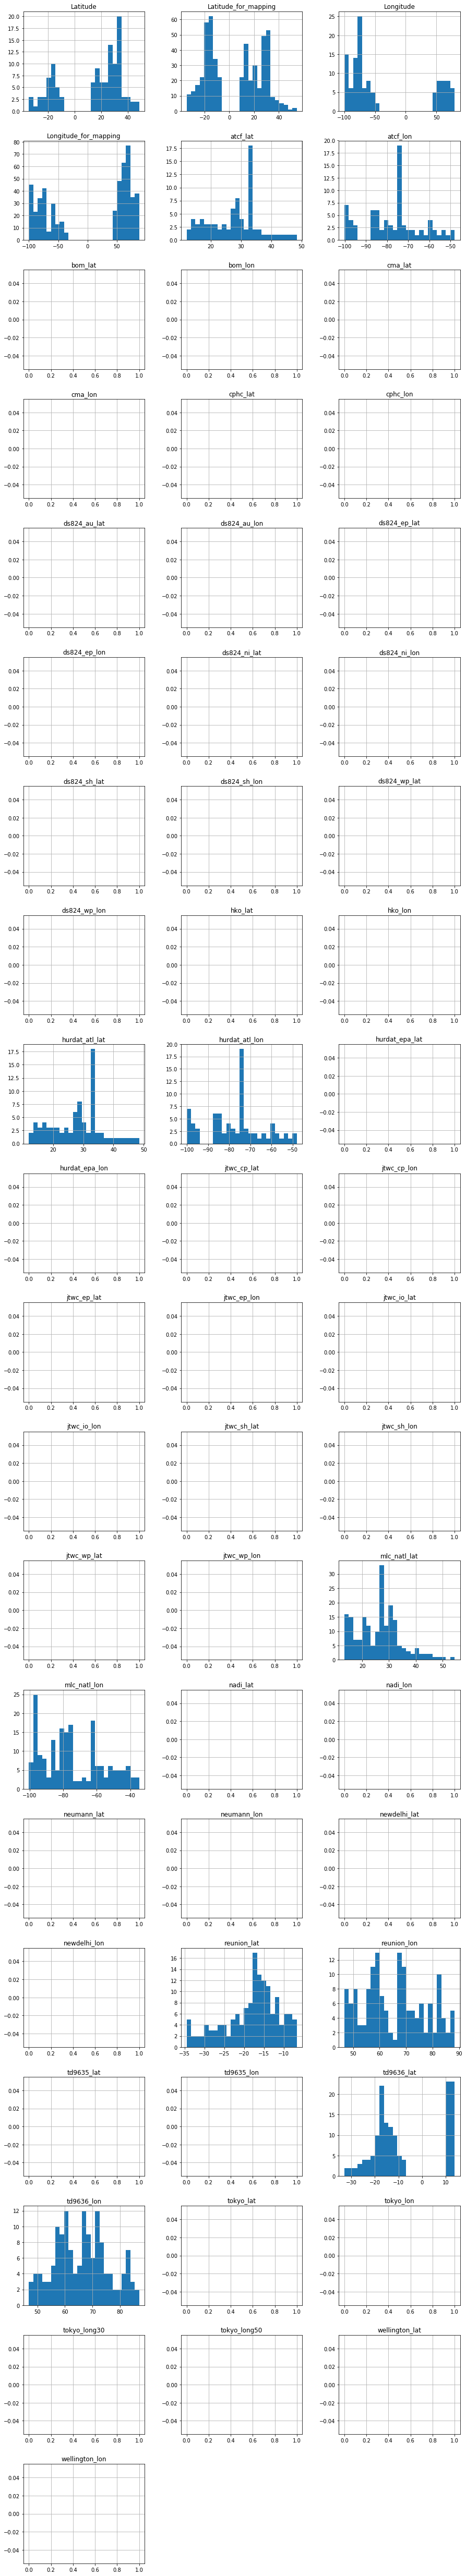

In [59]:
location_df.hist(bins=25, layout=(20,3), figsize=(15,90))